<a href="https://colab.research.google.com/github/alicodes-dotcom/TSF_DS-BA_TASKS/blob/main/TASK_6_DS_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TSF GRIP MAR2021**
#**FUNCTION: DS&BA**
#**NAME: MOHAMMED WAJAHATH ALI**
#***ORGANISATION: THE SPARKS FOUNDATION***

#**TASK-6: Prediction using Decision Tree Algorithm**

##**QS: Create the Decision Tree classifier and visualize it graphically.**
##**The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

#STEP-1: IMPORTING LIBRARIES.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree


#STEP-2: IMPORTING DATASETS.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Removing ID column.

In [3]:
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Setting Labels for Species Column.

In [4]:
df['Species'] = df['Species'].map({'Iris-setosa': 0,'Iris-versicolor':1 ,'Iris-virginica':2})

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.isnull == True

False

In [8]:
df.shape

(150, 5)

##Visualizing data with pair plots.

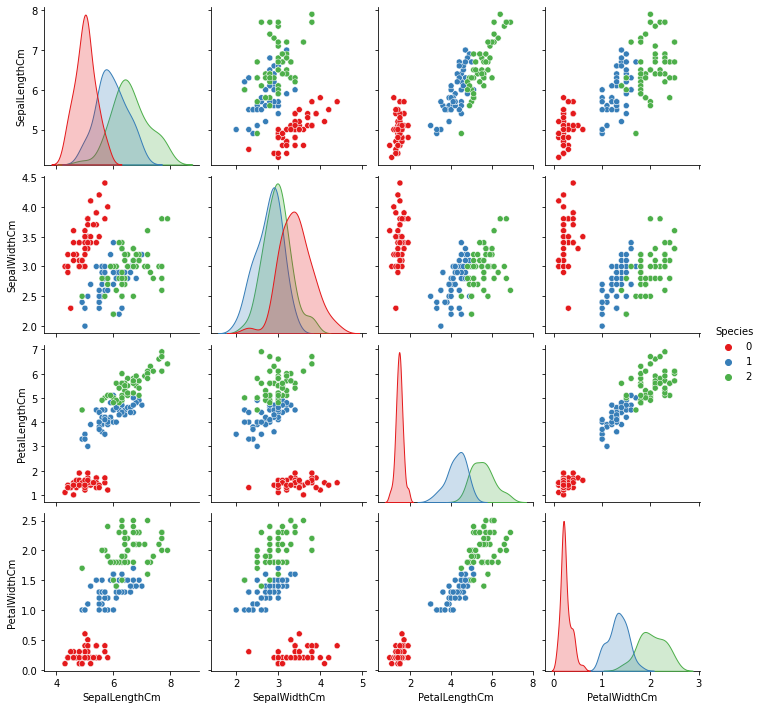

In [9]:
sns.pairplot(df,hue='Species',palette='Set1')

##It can be inferred from the plot that Iris-setosa forms a separate cluster, as compared to the other two species, Iris-versicolor and Iris-virginica which form closely placed clusters.

##SPLITTING THE DATASET INTO DEPENDENT AND INDEPENDENT.

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [11]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


#STEP-3: DEFINING THE DECISION-TREE ALGORITHM.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) 
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print("Training Complete.")

Training Complete.



Prediction and Comparision

In [14]:
y_pred = classifier.predict(X_test)



Making the confusion Matrix

In [15]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]])

Making Classification Report

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Finding Accuracy Score

In [17]:
accuracy_score(y_test,y_pred)

0.9777777777777777

Heatmap For accuracy.

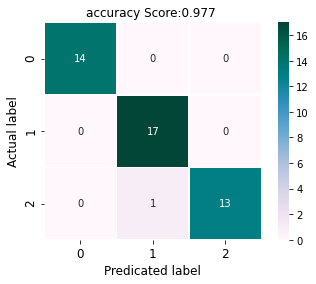

In [18]:
accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',linewidths=0.5,square=True,cmap="PuBuGn")
plt.title("accuracy Score:0.977 ",fontsize=12)
plt.xlabel("Predicated label",fontsize=12)
plt.ylabel("Actual label",fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

##***We have got around 98% Accuracy For This Model.***

#Visualizing decision tree:

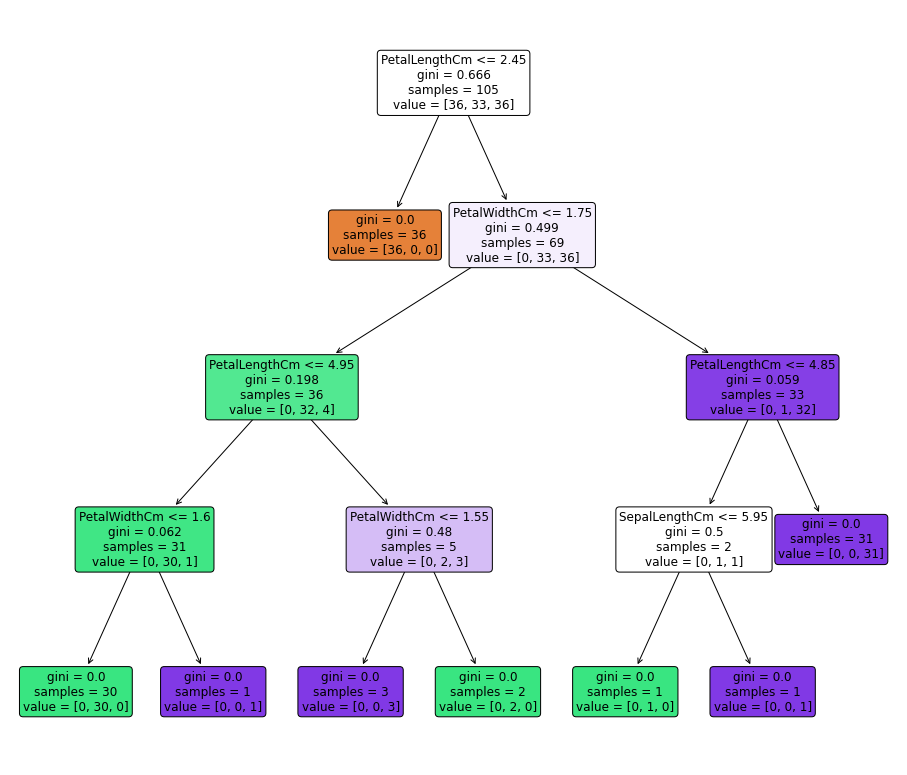

In [19]:
plt.figure(figsize=(16,14))
dtree= tree.plot_tree(classifier, feature_names = x.columns , fontsize = 12 , filled = True, rounded=True)

##Prediction On Randomly Created Data.

In [20]:
new_data =  pd.DataFrame({'SepalLengthCm':[3.1,2.4,4.6,1.8,5.2],
                         'SepalWidthCm':[4.3,6.1,2.4,3.3,5.1],
                         'PetalLengthCm':[2.2,3.3,4.4,3.3,2.2],
                         'PetalWidthCm':[0.8,0.7,1.4,1.6,0.9]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.1,4.3,2.2,0.8
1,2.4,6.1,3.3,0.7
2,4.6,2.4,4.4,1.4
3,1.8,3.3,3.3,1.6
4,5.2,5.1,2.2,0.9


Prediction using new Data

In [21]:
new_predict = classifier.predict(new_data)

In [22]:
new_data['Predicted Species'] = new_predict
new_data['Predicted Species'] = new_data['Predicted Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,3.1,4.3,2.2,0.8,Iris-setosa
1,2.4,6.1,3.3,0.7,Iris-versicolor
2,4.6,2.4,4.4,1.4,Iris-versicolor
3,1.8,3.3,3.3,1.6,Iris-versicolor
4,5.2,5.1,2.2,0.9,Iris-setosa


**This is the Predicted Species column, we can see the predictions on our randomly created data.**

**Hence, decision tree algorithm has been successfully created, visualised and prediction on new data was made with the accuracy of 97%.**

#**THANK YOU**